In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [9]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_iris = pd.read_csv('/Users/samabrams/Data Analysis Projects/ClimateWins-ML-Project/02 Data/Original Data/sample_iris.csv', names=col_names, header=0)

In [11]:
df_iris.columns
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
## map each iris species number to a name with a dictionary.
iris_class = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
df_iris['species_name'] = [iris_class[i] for i in df_iris.species]

KeyError: 'Iris-setosa'

In [15]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
df_iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [29]:
# subset for plotting the petal data
columns = ['petal_length', 'petal_width', 'species']
df2 = df_iris[columns]

In [31]:
df2

,petal_length,petal_width,species
1,1.4,0.2,Iris-setosa
2,1.4,0.2,Iris-setosa
3,1.3,0.2,Iris-setosa
4,1.5,0.2,Iris-setosa
5,1.4,0.2,Iris-setosa
...,...,...,...
146,5.2,2.3,Iris-virginica
147,5.0,1.9,Iris-virginica
148,5.2,2.0,Iris-virginica
149,5.4,2.3,Iris-virginica


([<matplotlib.axis.XTick at 0x163c1ef60>,
 [Text(0, 0, '1.0'),
  Text(8, 0, '1.9'),
  Text(16, 0, '4.0'),
  Text(27, 0, '5.1'),
  Text(42, 0, '6.9')])

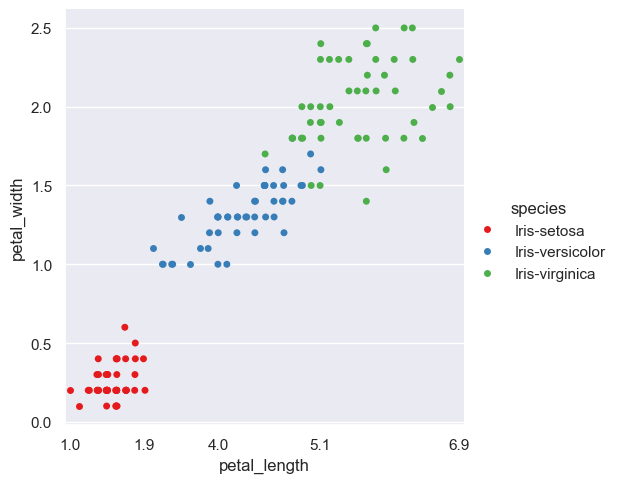

In [33]:
sns.set_theme()
g = sns.catplot(x="petal_length", y="petal_width", hue="species", palette='Set1', data=df2)
plt.xticks([0, 8, 16, 27, 42])

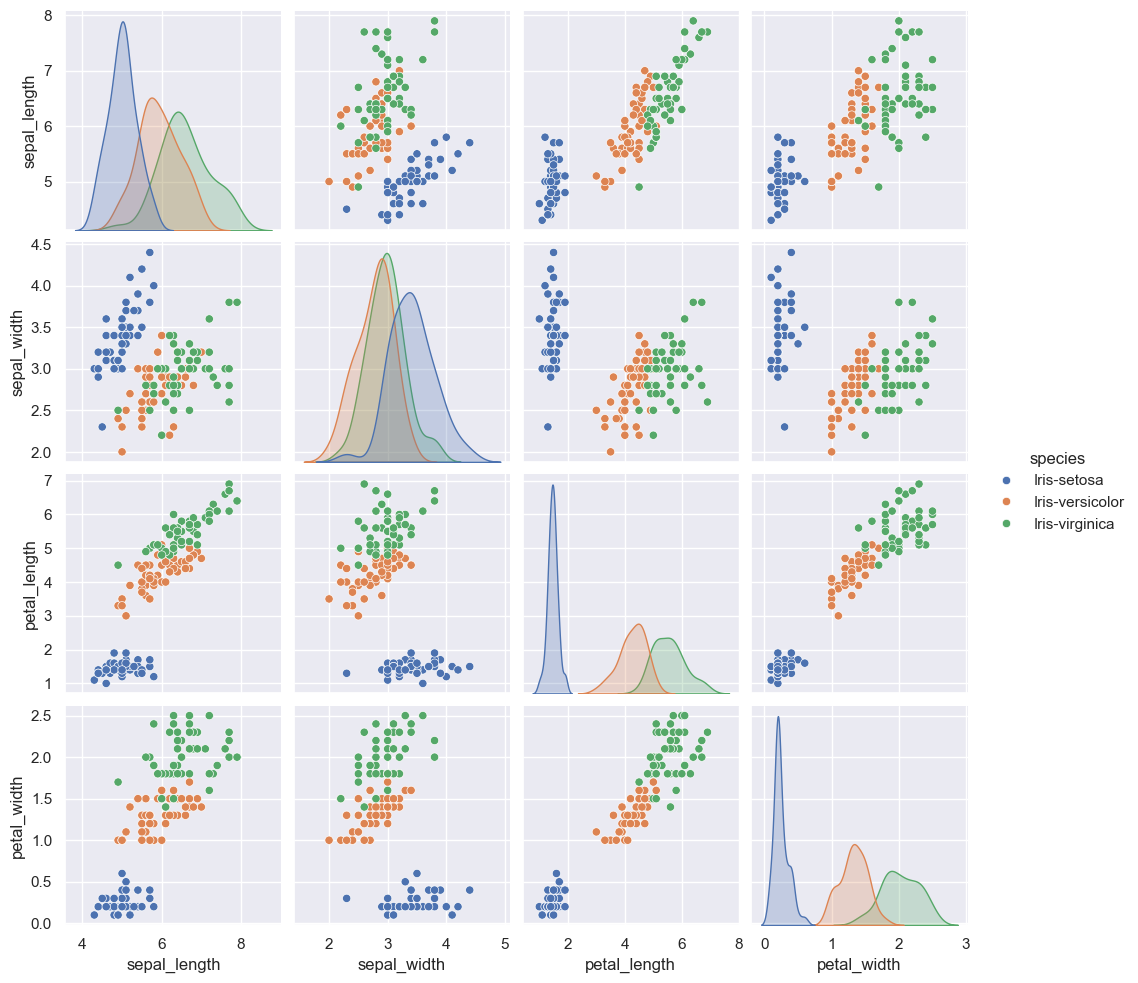

In [35]:
sns.pairplot(df_iris[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']], hue = 'species')
plt.show()

In [37]:
#No need to create a test and training split this time!

In [39]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df3 = df_iris[cols]
df3

,sepal_length,sepal_width,petal_length,petal_width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [41]:
#Scale the iris features
features = df3[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
scaled_features = StandardScaler().fit_transform(features)

In [43]:
scaled_features

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [45]:
#Run the PCA model, reducing to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)

In [47]:
principalComponents

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [49]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])

In [51]:
dfPCA

,PCA1,PCA2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [53]:
#Add the species to the dataframe to show the relationship
species = [df_iris['species']]
species

[1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
 5         Iris-setosa
             ...      
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 150    Iris-virginica
 Name: species, Length: 150, dtype: object]

In [55]:
dfPCA['species']= df_iris['species']

In [57]:
dfPCA

,PCA1,PCA2,species
0,-2.264542,0.505704,NaN
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


([<matplotlib.axis.XTick at 0x163e856a0>,
 [Text(0, 0, '-2.7741697937051586'),
  Text(40, 0, '-2.0444165193198023'),
  Text(80, 0, '0.6621261375659382'),
  Text(120, 0, '1.5990645856518704'),
  Text(149, 0, '')])

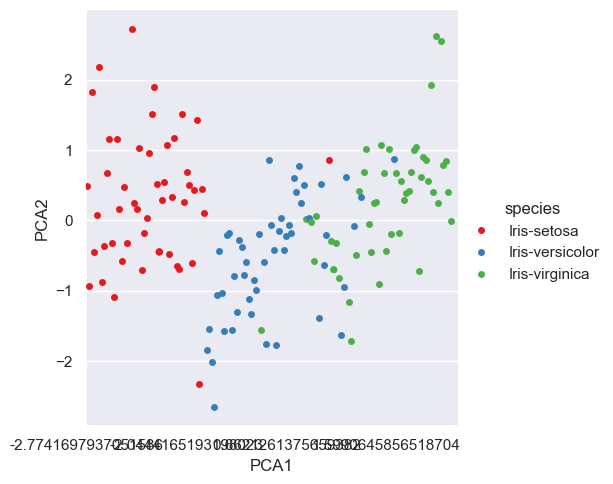

In [59]:
#PLot the two components, color coded by species
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="species", data=dfPCA)
plt.xticks([0, 40, 80, 120, 149])

In [61]:
#It's pretty easy to see the three species, even with only 2 out of 4 components!

In [63]:
#Run the PCA model, reducing to 1 component
pca = PCA(n_components=1)
principalComponents2 = pca.fit_transform(scaled_features)

In [65]:
principalComponents2

array([[-2.26454173],
       [-2.0864255 ],
       [-2.36795045],
       [-2.30419716],
       [-2.38877749],
       [-2.07053681],
       [-2.44571134],
       [-2.23384186],
       [-2.34195768],
       [-2.18867576],
       [-2.16348656],
       [-2.32737775],
       [-2.22408272],
       [-2.63971626],
       [-2.19229151],
       [-2.25146521],
       [-2.20275048],
       [-2.19017916],
       [-1.89407429],
       [-2.33994907],
       [-1.91455639],
       [-2.2046454 ],
       [-2.77416979],
       [-1.82041156],
       [-2.2282175 ],
       [-1.95702401],
       [-2.05206331],
       [-2.16819365],
       [-2.14030596],
       [-2.26879019],
       [-2.14455443],
       [-1.8319381 ],
       [-2.60820287],
       [-2.43795086],
       [-2.18867576],
       [-2.2111199 ],
       [-2.04441652],
       [-2.18867576],
       [-2.4359522 ],
       [-2.1705472 ],
       [-2.28652724],
       [-1.87170722],
       [-2.55783442],
       [-1.96427929],
       [-2.13337283],
       [-2

In [67]:
#Add the species to the dataframe to show the relationship
dfPCA2 = pd.DataFrame(principalComponents2, columns=['PCA1'])
dfPCA2['y']= 0
dfPCA2['species']= df_iris['species']
dfPCA2

,PCA1,y,species
0,-2.264542,0,NaN
1,-2.086426,0,Iris-setosa
2,-2.367950,0,Iris-setosa
3,-2.304197,0,Iris-setosa
4,-2.388777,0,Iris-setosa
...,...,...,...
145,1.870522,0,Iris-virginica
146,1.558492,0,Iris-virginica
147,1.520845,0,Iris-virginica
148,1.376391,0,Iris-virginica


([<matplotlib.axis.XTick at 0x163f0c080>,
 [Text(0, 0, '-2.7741697937051586'),
  Text(40, 0, '-2.0444165193198023'),
  Text(80, 0, '0.6621261375659382'),
  Text(120, 0, '1.5990645856518704'),
  Text(149, 0, '')])

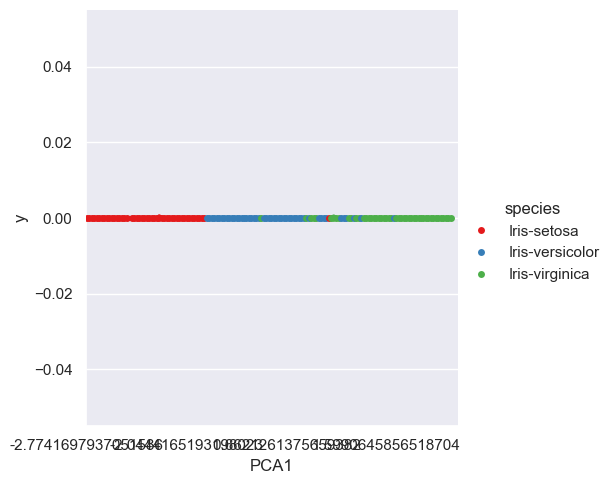

In [69]:
#PLot the component, color coded by species
sns.set_theme()
g = sns.catplot(x="PCA1", y='y', palette='Set1', hue="species", data=dfPCA2)
plt.xticks([0, 40, 80, 120, 149])

In [ ]:
#Some differences are discernible even with only 1 compenent!

## Hierarchal Clustering

### Single Method Clustering

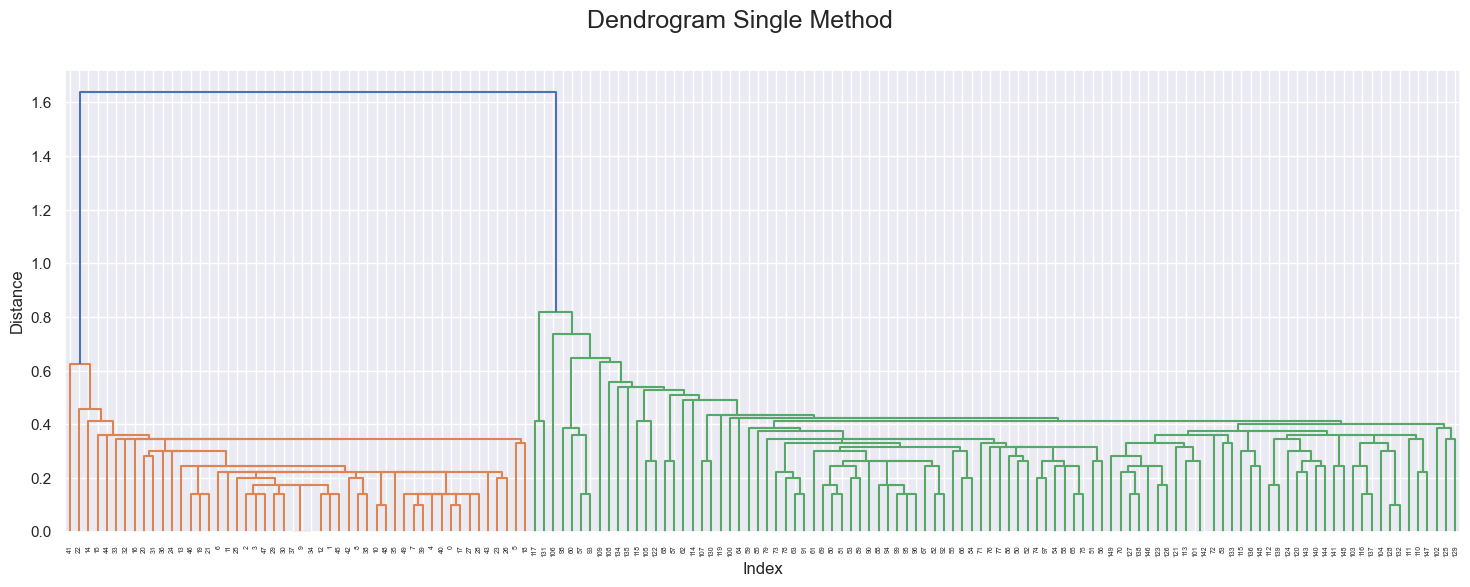

In [82]:
dist_sin = linkage(df_iris.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']],method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

In [84]:
df_iris_SM=df_iris.copy()

df_iris_SM['clust2']=fcluster(dist_sin,2, criterion='maxclust')
df_iris_SM['clust3']=fcluster(dist_sin,3, criterion='maxclust')
df_iris_SM.head()

,sepal_length,sepal_width,petal_length,petal_width,species,clust2,clust3
1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1,1


<Axes: title={'center': 'Species'}, xlabel='petal_length', ylabel='petal_width'>

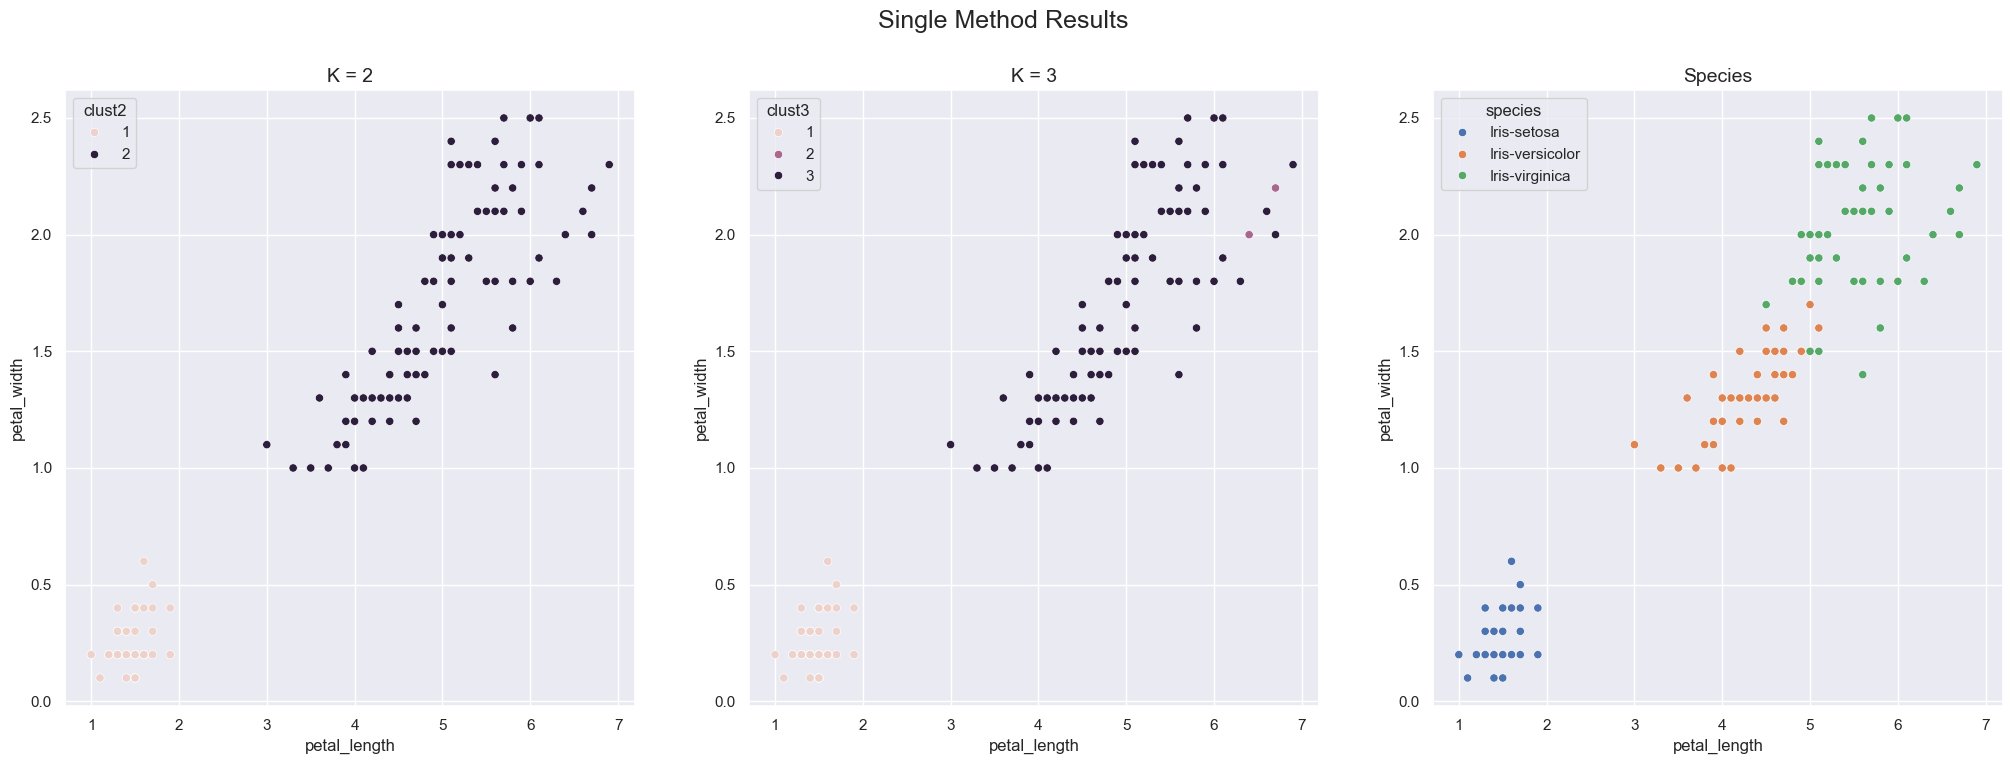

In [88]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Single Method Results",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="petal_length",y="petal_width", data=df_iris_SM, hue="clust2")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="petal_length",y="petal_width", data=df_iris_SM, hue="clust3")

plt.subplot(1,3,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="petal_length",y="petal_width", data=df_iris_SM, hue="species")

How Single Linkage Works
Single linkage (also called "nearest neighbor") measures the distance between clusters as the shortest distance between any two points in different clusters. When merging clusters, it always chooses the pair with the minimum distance between their closest points.
Why This Causes Problems with Iris Data
The issue stems from the overlapping nature of versicolor and virginica:

Overlapping distributions: Versicolor and virginica have overlapping ranges in their feature measurements (petal length, petal width, sepal measurements). Some versicolor flowers are very similar to some virginica flowers.
Chain effect: Single linkage is prone to creating "chains" - if there's even one versicolor point that's close to a virginica point, the algorithm will start merging them. Then, as it continues, it keeps adding points based on the single closest distance, creating a chain-like cluster that mixes both species.
Sensitivity to outliers: If there are any "bridge" points (versicolor flowers that happen to be very similar to virginica flowers in the feature space), single linkage will use these as connecting points, effectively merging what should be separate clusters.

Why Setosa Works Better
Setosa remains well-separated because it's genuinely distinct from the other two species in the feature space - there's a clear gap between setosa and the versicolor/virginica group.
Alternative Linkage Methods
This is why other linkage methods often work better for iris data:

Complete linkage: Uses the maximum distance between clusters (more conservative)
Average linkage: Uses the average distance between all points in clusters
Ward linkage: Minimizes within-cluster variance

These methods are less susceptible to the "chaining" problem that single linkage creates with overlapping clusters.

<Axes: title={'center': 'K = 3'}, xlabel='species', ylabel='clust3'>

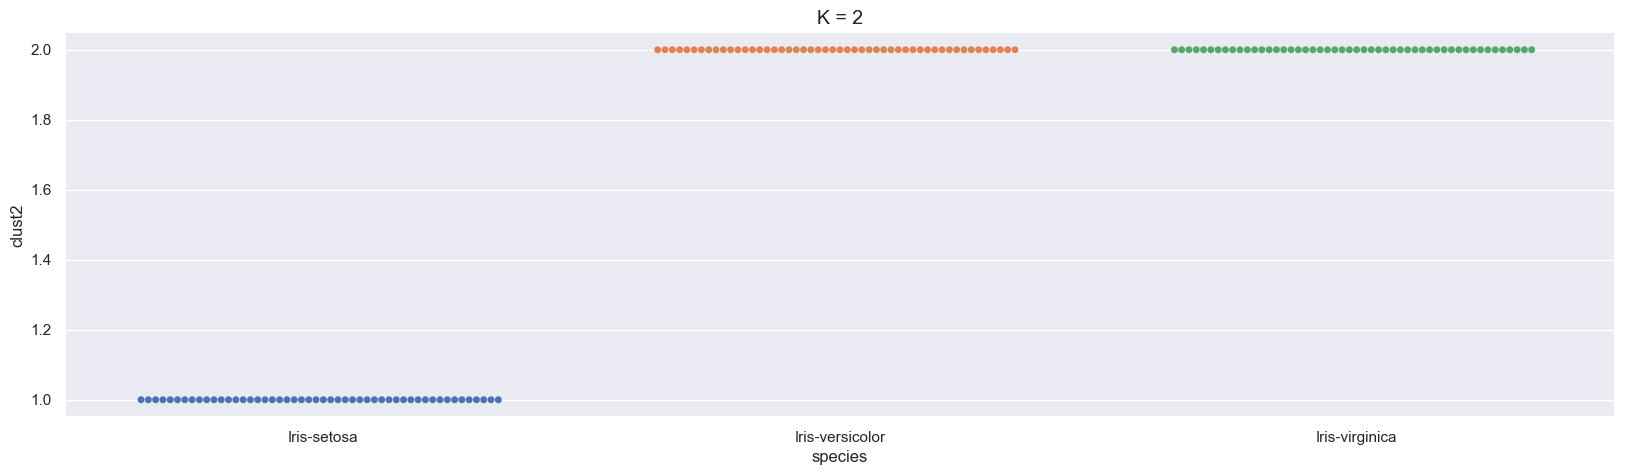

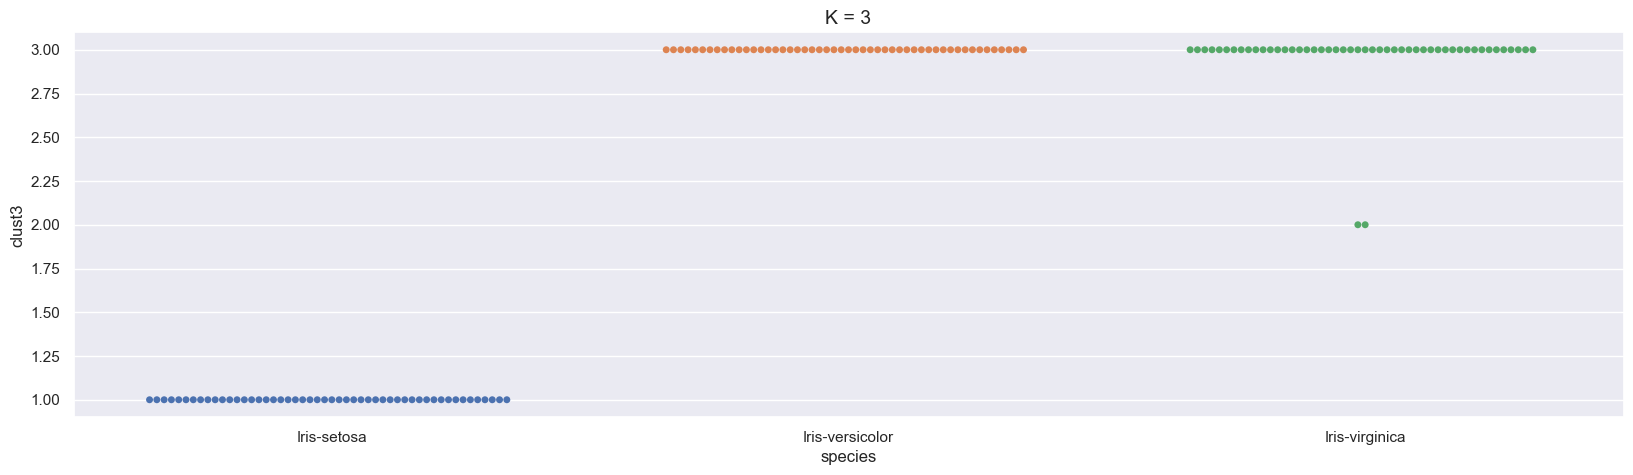

In [94]:
plt.figure(figsize=(20,5))
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="species",y="clust2", data=df_iris_SM, hue="species")

plt.figure(figsize=(20,5))
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="species",y="clust3", data=df_iris_SM, hue="species")

It looks like even for three clusters, the “single” method categorizes the versicolor and virginica varieties the same. Let’s repeat this process for the “complete,” “average,” and “ward” methods to see the difference.

### Complete Method

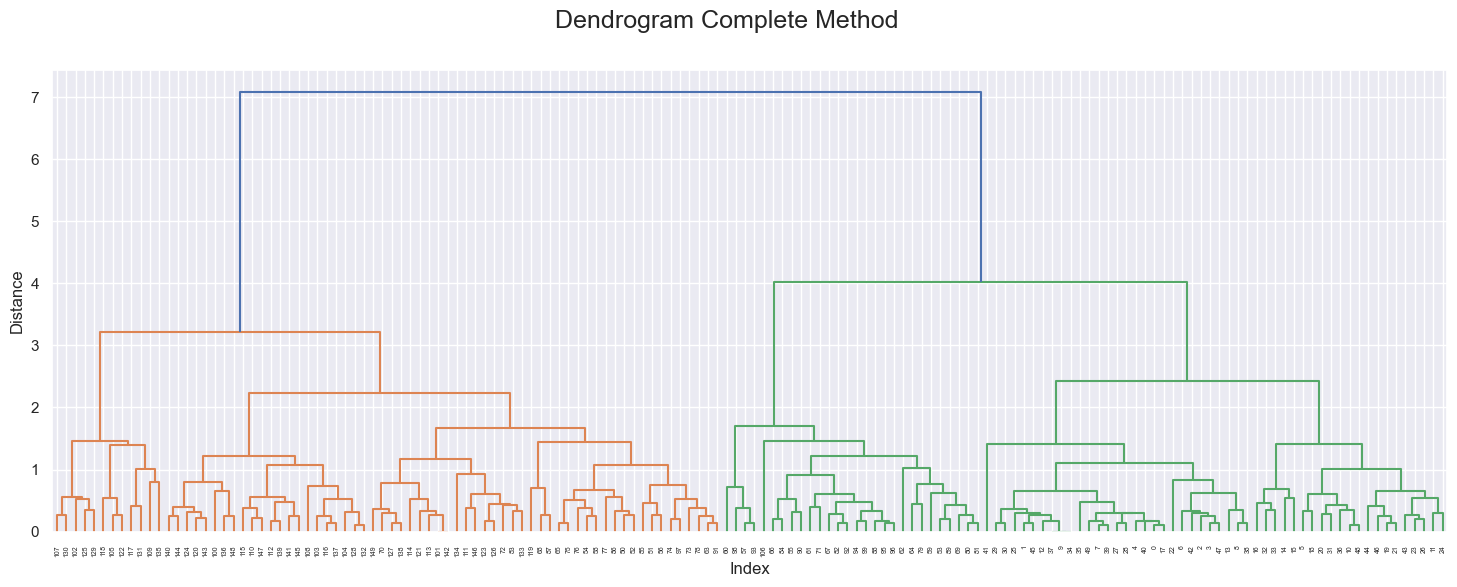

In [102]:
dist_complete = linkage(df_iris.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method", fontsize=18)
plt.show()

### Average Method

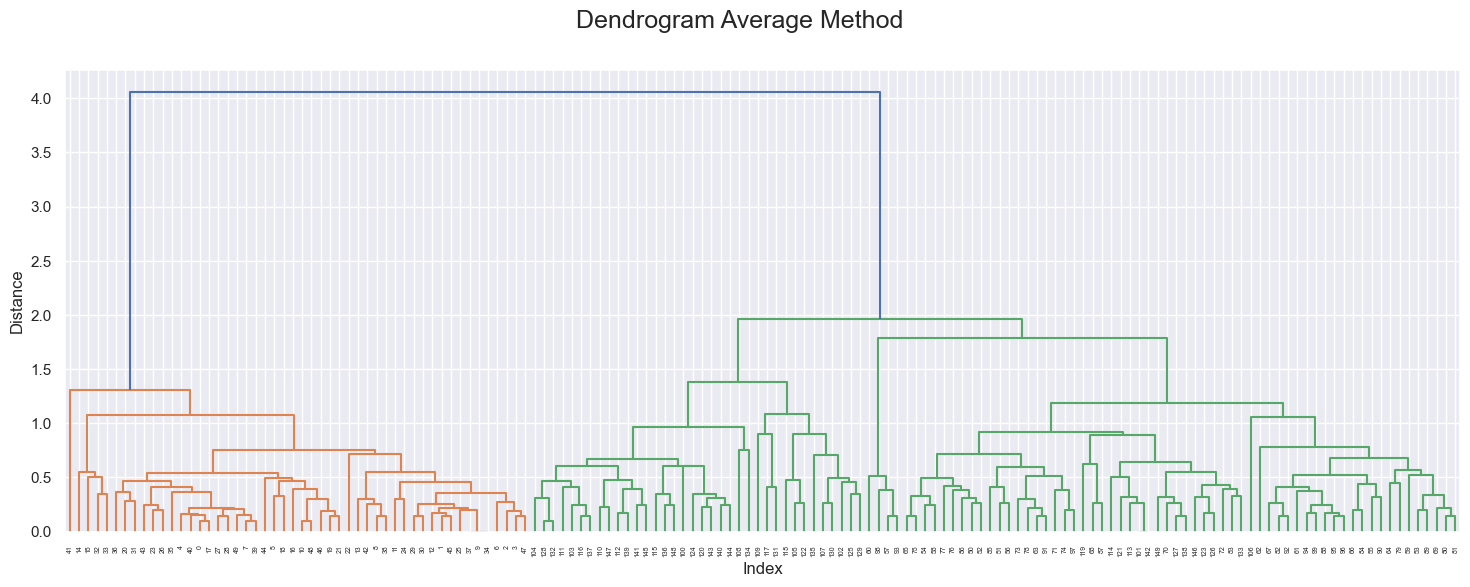

In [106]:
dist_average = linkage(df_iris.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method", fontsize=18)
plt.show()

### Ward's Method

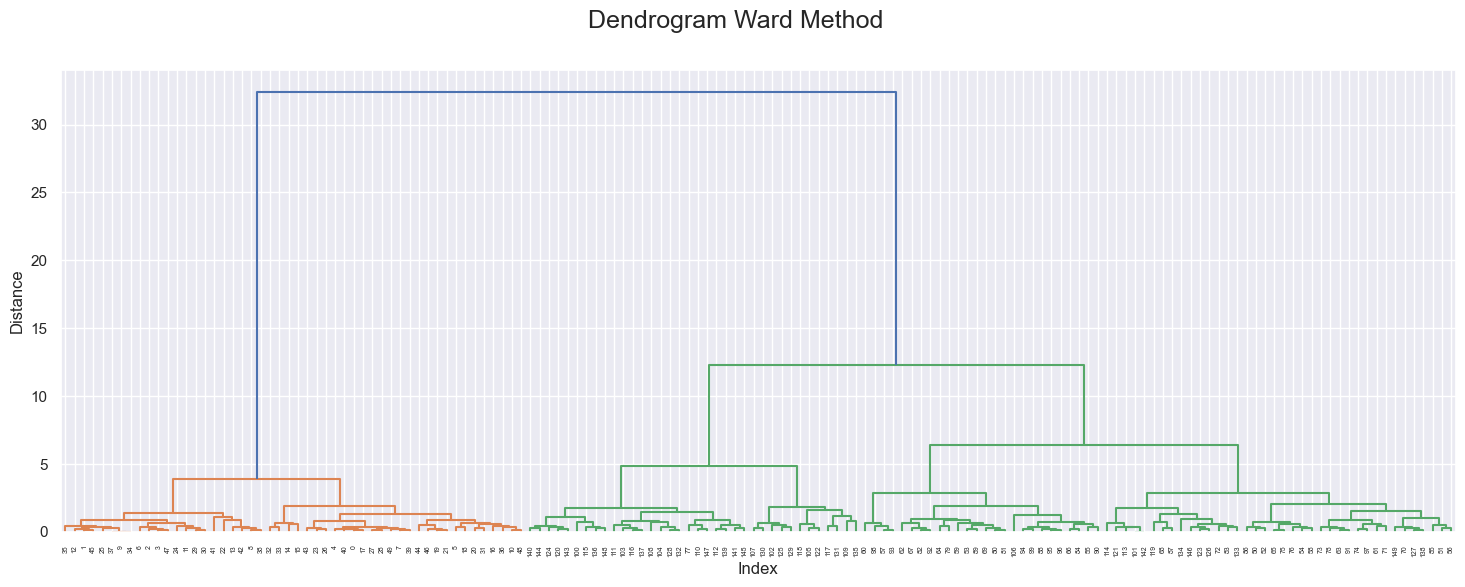

In [108]:
dist_ward = linkage(df_iris.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method", fontsize=18)
plt.show()

In [112]:
#Look at all of the confusion matrices results together.
print("SINGLE")
print(pd.crosstab(df_iris_SM["species"],df_iris_SM["clust3"]))
print("COMPLETE")
print(pd.crosstab(df_iris_CM["species"],df_iris_CM["clust3"]))
print("AVERAGE")
print(pd.crosstab(df_iris_AM["species"],df_iris_AM["clust3"]))
print("WARD")
print(pd.crosstab(df_iris_WM["species"],df_iris_WM["clust3"]))

SINGLE
clust3            1  2   3
species                   
Iris-setosa      50  0   0
Iris-versicolor   0  0  50
Iris-virginica    0  2  48
COMPLETE


NameError: name 'df_iris_CM' is not defined